### Загружаем библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from pandas.plotting import scatter_matrix

### Загружаем датасеты

In [2]:
X_bp = pd.read_excel('X_bp.xlsx')
X_nup = pd.read_excel('X_nup.xlsx')

X_bp

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0              0                         1.857143       2030.000000   
1              1                         1.857143       2030.000000   
2              2                         1.857143       2030.000000   
3              3                         1.857143       2030.000000   
4              4                         2.771331       2030.000000   
...          ...                              ...               ...   
1018        1018                         2.271346       1952.087902   
1019        1019                         3.444022       2050.089171   
1020        1020                         3.280604       1972.372865   
1021        1021                         3.705351       2066.799773   
1022        1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  
1                       3000.000000               220.000000  
2                       3000.000000               220.000000  
3                       3000.000000               220.000000  
4                       3000.000000               220.000000  
...                             ...                      ...  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022     

In [5]:
X_bp.isna().sum()

Unnamed: 0                              0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
dtype: int64

In [6]:
X_nup

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0            0.0                 0.0     4.000000          57.000000
1            1.0                 0.0     4.000000          60.000000
2            2.0                 0.0     4.000000          70.000000
3            3.0                 0.0     5.000000          47.000000
4            4.0                 0.0     5.000000          57.000000
...          ...                 ...          ...                ...
1035      1035.0                90.0     8.088111          47.759177
1036      1036.0                90.0     7.619138          66.931932
1037      1037.0                90.0     9.800926          72.858286
1038      1038.0                90.0    10.079859          65.519479
1039      1039.0                90.0     9.021043          66.920143

[1040 rows x 4 columns]

In [7]:
X_nup.isna().sum()

Unnamed: 0            0
Угол нашивки, град    0
Шаг нашивки           0
Плотность нашивки     0
dtype: int64

### Объединяем датасеты

In [3]:
df = X_bp.merge(X_nup, how ='inner')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1018                         2.271346       1952.087902   
1019                         3.444022       2050.089171   
1020                         3.280604       1972.372865   
1021                         3.705351       2066.799773   
1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1018                    2387.292495               125.007669   
1019                    2360.392784               117.730099   
1020                    2662.906040               236.606764   
1021                    2071.715856               197.126067   
1022                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

In [9]:
#Проверяем на пропуски

df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

### Строим гистограммы распределения

In [10]:
df.hist(figsize=(15,15))
plt.show()

### Строим матрицу рассеяния

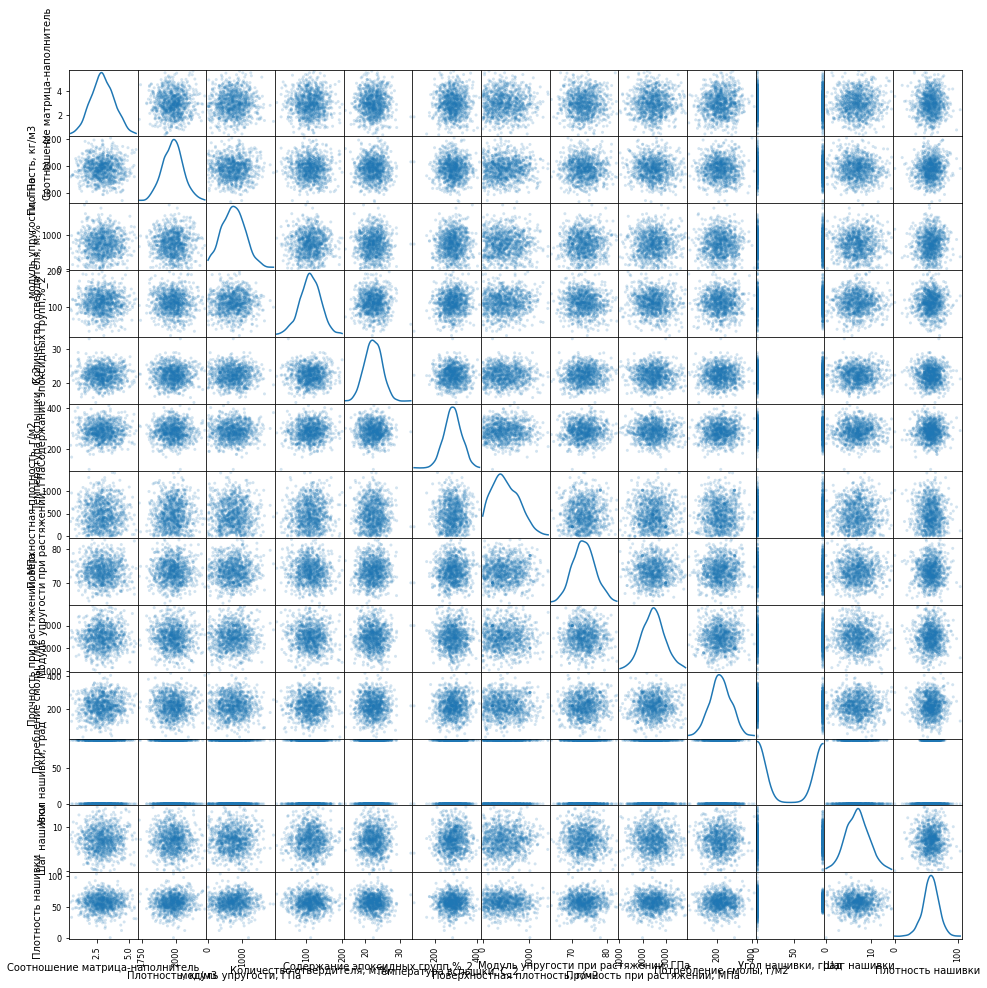

In [4]:
scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde');

### Считаем медиану и среднее

In [51]:
values = pd.DataFrame(index = ['Соотношение матрица-наполнитель',
                                    'Плотность, кг/м3',
                                    'модуль упругости, ГПа',
                                    'Количество отвердителя, м.%',
                                    'Содержание эпоксидных групп,%_2',
                                    'Температура вспышки, С_2',
                                    'Поверхностная плотность, г/м2',
                                    'Модуль упругости при растяжении, ГПа',
                                    'Прочность при растяжении, МПа',
                                    'Потребление смолы, г/м2', 
                                    'Угол нашивки, град', 
                                    'Шаг нашивки', 
                                    'Плотность нашивки'])
values['Медиана'] = [df['Соотношение матрица-наполнитель'].median(),
                     df['Плотность, кг/м3'].median(),
                     df['модуль упругости, ГПа'].median(),
                     df['Количество отвердителя, м.%'].median(),
                     df['Содержание эпоксидных групп,%_2'].median(),
                     df['Температура вспышки, С_2'].median(),
                     df['Поверхностная плотность, г/м2'].median(),
                     df['Модуль упругости при растяжении, ГПа'].median(),
                     df['Прочность при растяжении, МПа'].median(),
                     df['Потребление смолы, г/м2'].median(),
                     df['Угол нашивки, град'].median(),
                     df['Шаг нашивки'].median(),
                     df['Плотность нашивки'].median()
                    ]
values['Среднее'] = [df['Соотношение матрица-наполнитель'].mean(),
                     df['Плотность, кг/м3'].mean(),
                     df['модуль упругости, ГПа'].mean(),
                     df['Количество отвердителя, м.%'].mean(),
                     df['Содержание эпоксидных групп,%_2'].mean(),
                     df['Температура вспышки, С_2'].mean(),
                     df['Поверхностная плотность, г/м2'].mean(),
                     df['Модуль упругости при растяжении, ГПа'].mean(),
                     df['Прочность при растяжении, МПа'].mean(),
                     df['Потребление смолы, г/м2'].mean(),
                     df['Угол нашивки, град'].mean(),
                     df['Шаг нашивки'].mean(),
                     df['Плотность нашивки'].mean()
                    ]

values

Медиана      Среднее
Соотношение матрица-наполнитель          2.907832     2.927964
Плотность, кг/м3                      1977.321002  1974.118744
модуль упругости, ГПа                  736.178435   736.119982
Количество отвердителя, м.%            111.162090   111.136066
Содержание эпоксидных групп,%_2         22.177681    22.200570
Температура вспышки, С_2               286.220763   286.181128
Поверхностная плотность, г/м2          457.732246   482.429070
Модуль упругости при растяжении, ГПа    73.247594    73.303464
Прочность при растяжении, МПа         2455.974462  2461.491315
Потребление смолы, г/м2                218.697660   218.048059
Угол нашивки, град                      90.000000    45.976139
Шаг нашивки                              6.972862     6.931939
Плотность нашивки                       57.584225    57.562887

### Нормализуем данные

In [13]:
headers = list(df.columns.values)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(df)
X_bp_norm = pd.DataFrame(np_scaled)
X_bp_norm.columns = headers
X_bp_norm.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         0.282131          0.626533               0.385679   
1                         0.282131          0.626533               0.385679   
2                         0.282131          0.626533               0.385679   
3                         0.282131          0.626533               0.385679   
4                         0.457857          0.626533               0.393150   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     0.067654                         0.427467   
1                     0.178021                         0.506535   
2                     0.177469                         1.000000   
3                     0.613972                         0.373167   
4                     0.519387                         0.427467   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  0.000000                       0.149682   
1                  0.589311                       0.149682   
2                  0.589311                       0.149682   
3                  0.638420                       0.149682   
4                  0.589311                       0.149682   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                              0.319194                       0.698235   
1                              0.319194                       0.698235   
2                              0.319194                       0.698235   
3                              0.319194                       0.698235   
4                              0.319194                       0.698235   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 0.488979                 0.0     0.276998           0.548135  
1                 0.488979                 0.0     0.276998           0.576985  
2                 0.488979                 0.0     0.276998           0.673149  
3                 0.488979                 0.0     0.346248           0.451971  
4                 0.488979                 0.0     0.346248           0.548135

### Строим тепловую карту корреляции

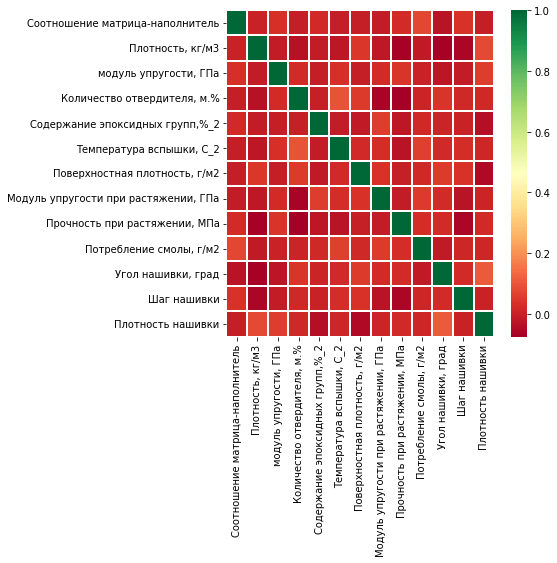

In [14]:
len(X_bp_norm)
f, ax = plt.subplots(figsize=(6, 6))
corr = np.round_(X_bp_norm.corr(), decimals=3)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2);

### Строим гистограммы рассеяния после нормализации

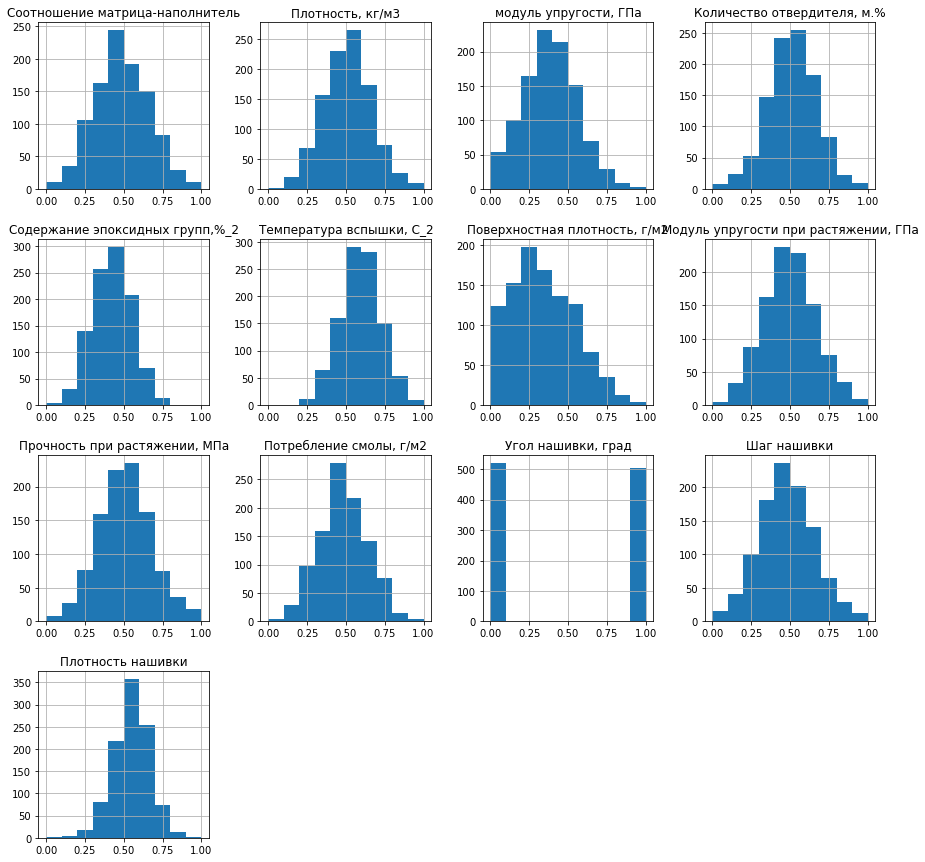

In [15]:
X_bp_norm.hist(figsize=(15,15))
plt.show()

### Находим минимальные и максимальные значения

In [16]:
X_bp_minmax = pd.DataFrame(index = ['Соотношение матрица-наполнитель',
                                    'Плотность, кг/м3',
                                    'модуль упругости, ГПа',
                                    'Количество отвердителя, м.%',
                                    'Содержание эпоксидных групп,%_2',
                                    'Температура вспышки, С_2',
                                    'Поверхностная плотность, г/м2',
                                    'Модуль упругости при растяжении, ГПа',
                                    'Прочность при растяжении, МПа',
                                    'Потребление смолы, г/м2', 
                                    'Угол нашивки, град', 
                                    'Шаг нашивки', 
                                    'Плотность нашивки'], dtype = 'str')

X_bp_minmax['Минимальные значения'] = [np.round(df['Соотношение матрица-наполнитель'].min(), decimals = 2), 
                                       np.round(df['Плотность, кг/м3'].min(), decimals = 2),
                                       np.round(df['модуль упругости, ГПа'].min(), decimals = 2),
                                       np.round(df['Количество отвердителя, м.%'].min(), decimals = 2),
                                       np.round(df['Содержание эпоксидных групп,%_2'].min(), decimals = 2),
                                       np.round(df['Температура вспышки, С_2'].min(), decimals = 2),
                                       np.round(df['Поверхностная плотность, г/м2'].min(), decimals = 2),
                                       np.round(df['Модуль упругости при растяжении, ГПа'].min(), decimals = 2),
                                       np.round(df['Прочность при растяжении, МПа'].min(), decimals = 2),
                                       np.round(df['Потребление смолы, г/м2'].min(), decimals = 2),
                                       np.round(df['Угол нашивки, град'].min(), decimals = 2),
                                       np.round(df['Шаг нашивки'].min(), decimals = 2),
                                       np.round(df['Плотность нашивки'].min(), decimals = 2)
                                      ]

X_bp_minmax['Максимальные значения'] = [np.round(df['Соотношение матрица-наполнитель'].max(), decimals = 2),
                                        np.round(df['Плотность, кг/м3'].max(), decimals = 2),
                                        np.round(df['модуль упругости, ГПа'].max(), decimals = 2),
                                        np.round(df['Количество отвердителя, м.%'].max(), decimals = 2),
                                        np.round(df['Содержание эпоксидных групп,%_2'].max(), decimals = 2),
                                        np.round(df['Температура вспышки, С_2'].max(), decimals = 2),
                                        np.round(df['Поверхностная плотность, г/м2'].max(), decimals = 2),
                                        np.round(df['Модуль упругости при растяжении, ГПа'].max(), decimals = 2),
                                        np.round(df['Прочность при растяжении, МПа'].max(), decimals = 2),
                                        np.round(df['Потребление смолы, г/м2'].max(), decimals = 2),
                                        np.round(df['Угол нашивки, град'].max(), decimals = 2),
                                        np.round(df['Шаг нашивки'].max(), decimals = 2),
                                        np.round(df['Плотность нашивки'].max(), decimals = 2)
                                       ]

X_bp_minmax

Минимальные значения  \
Соотношение матрица-наполнитель                       0.39   
Плотность, кг/м3                                   1731.76   
модуль упругости, ГПа                                 2.44   
Количество отвердителя, м.%                          17.74   
Содержание эпоксидных групп,%_2                      14.25   
Температура вспышки, С_2                            100.00   
Поверхностная плотность, г/м2                         0.60   
Модуль упругости при растяжении, ГПа                 64.05   
Прочность при растяжении, МПа                      1036.86   
Потребление смолы, г/м2                              33.80   
Угол нашивки, град                                    0.00   
Шаг нашивки                                           0.00   
Плотность нашивки                                     0.00   

                                      Максимальные значения  
Соотношение матрица-наполнитель                        5.59  
Плотность, кг/м3                                    2207.77  
модуль упругости, ГПа                               1911.54  
Количество отвердителя, м.%                          198.95  
Содержание эпоксидных групп,%_2                       33.00  
Температура вспышки, С_2                             413.27  
Поверхностная плотность, г/м2                       1399.54  
Модуль упругости при растяжении, ГПа                  82.68  
Прочность при растяжении, МПа                       3848.44  
Потребление смолы, г/м2                              414.59  
Угол нашивки, град                                    90.00  
Шаг нашивки                                           14.44  
Плотность нашивки                                    103.99

### Проверяем на выбросы

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df, orient = 'h');

### Избавляемся от выбросов

In [40]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    Is = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return Is

In [41]:
index_list = []
for feature in ['Соотношение матрица-наполнитель',
                                    'Плотность, кг/м3',
                                    'модуль упругости, ГПа',
                                    'Количество отвердителя, м.%',
                                    'Содержание эпоксидных групп,%_2',
                                    'Температура вспышки, С_2',
                                    'Поверхностная плотность, г/м2',
                                    'Модуль упругости при растяжении, ГПа',
                                    'Прочность при растяжении, МПа',
                                    'Потребление смолы, г/м2', 
                                    'Угол нашивки, град', 
                                    'Шаг нашивки', 
                                    'Плотность нашивки',]:
    index_list.extend(outliers(df, feature))

In [42]:
def remove(df, Is):
    Is = sorted(set(Is))
    df = df.drop(Is)
    
    return df

In [43]:
df = remove(df, index_list) # сделать 3 раза, начиная с "def outliers" для полной очистки от выбросов

### Сохраняем полученный датасет для построения моделей

In [ ]:
df.to_csv('Очищенный датасет.csv', encoding = 'cp1251')